In [2]:
#* for data manipulation 
import pandas as pd 
import numpy as np 

from disk_analysis_tools import tiling_disk_plots as tdp
from disk_analysis_tools import tiling_disk_utils as tdu

#* for plotting: 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
sns.set_theme(style="ticks")
sns.set_context("talk")

from pathlib import Path
measurement_folder  = Path.cwd().parent / 'measurements'

In [50]:
table_ref_pre = tdu.read_single_measurement(measurement_folder/'steel_disk', '20220419_table_ref.txt')
table_ref_pre = tdu.df_convert_unix_to_datetime(table_ref_pre)

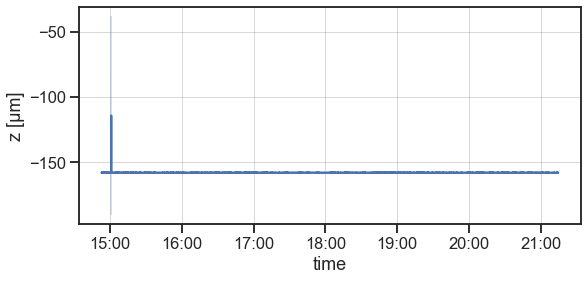

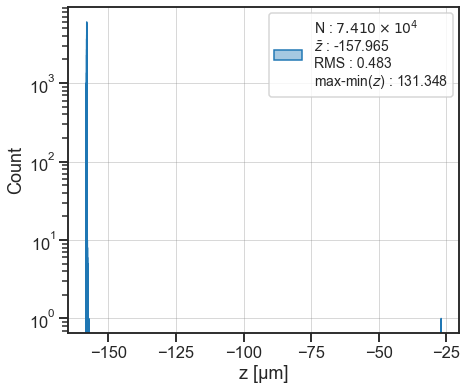

In [52]:
tdp.plot_data_vs_time(table_ref_pre)
tdp.ts_hist(table_ref_pre)
plt.yscale('log')

In [53]:
table_ref_pre_outs = table_ref_pre.loc[table_ref_pre.z > -100]

outlierer occure as always just in the first point of the measurement of a hexagon 

In [55]:
table_ref_pre_outs.point.unique()

array([1], dtype=int64)

In [57]:
table_ref_pre = table_ref_pre.loc[table_ref_pre.point != 1,:]

In [58]:
table_pre_pt = tdu.point_table(table_ref_pre)

## steeplate after curing 

In [60]:
curing_disk = tdu.read_single_measurement(measurement_folder/'steel_disk', '20220421_steeplate_01_curing.txt')

filter for last run

In [63]:
last_run = curing_disk.run_nr.unique()[-1]

In [65]:
curing_disk = curing_disk.loc[curing_disk.run_nr == last_run,:]
curing_disk = tdu.df_convert_unix_to_datetime(curing_disk)

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Count'>)

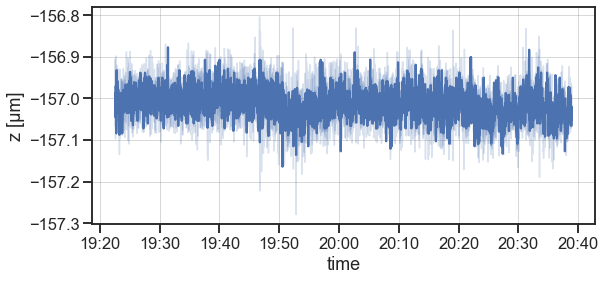

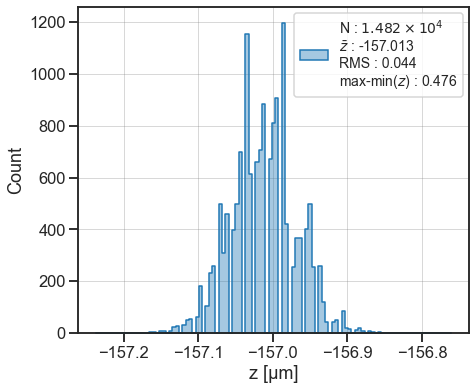

In [66]:
tdp.plot_data_vs_time(curing_disk)
tdp.ts_hist(curing_disk)

In [67]:
curing_disk_pt = tdu.point_table(curing_disk)

## combine pre handling

In [69]:
steel_pre_rel = tdu.combine_mean_measurements(curing_disk_pt, table_pre_pt)
steel_pre_rel = tdu.df_convert_unix_to_datetime(steel_pre_rel)

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Count'>)

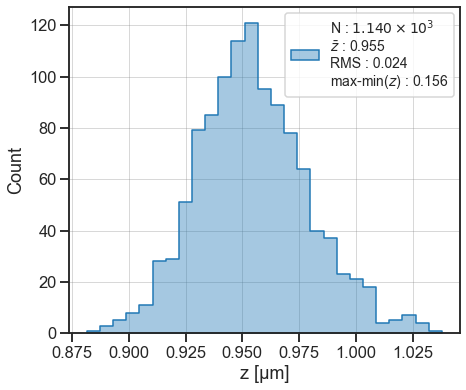

In [71]:
tdp.ts_hist(steel_pre_rel, mode='z_mean')

In [72]:
steel_pre_rel.z_mean = tdu.subtract_mean(steel_pre_rel.z_mean)
steel_pre_rel.z_mean = tdu.convert_mm_to_microns(steel_pre_rel.z_mean)

(<Figure size 864x864 with 5 Axes>,
 (<AxesSubplot:title={'center':'Steelplate - Table before Handling'}>,
  <AxesSubplot:xlabel='x [mm]'>,
  <AxesSubplot:ylabel='y [mm]'>))

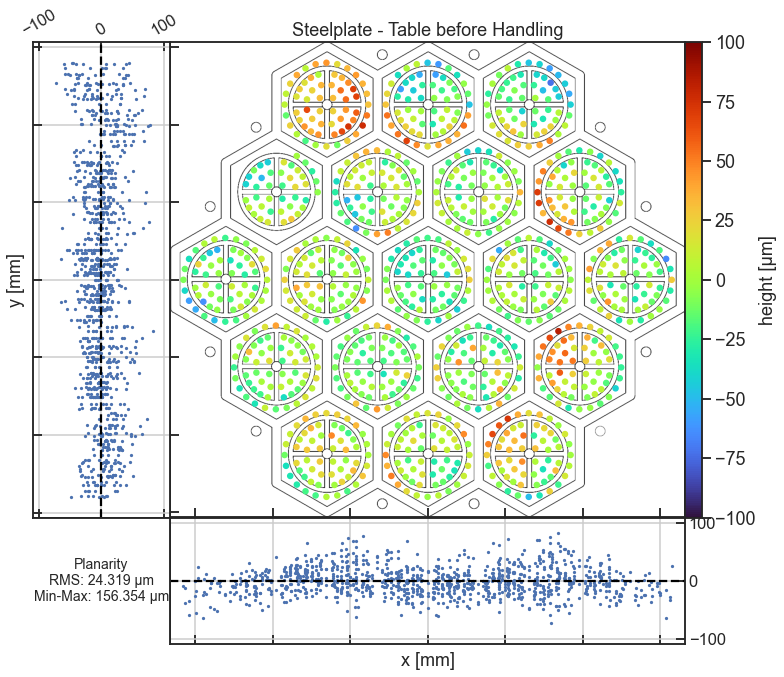

In [79]:
tdp.plot_table_hexagon_flatness(steel_pre_rel, mode='z_mean', title='Steelplate - Table before Handling')

# after handling

## Table Ref

import data

In [3]:
table_ref = tdu.read_single_measurement(measurement_folder/'steel_disk', '20220502_table_ref.txt')
table_ref = tdu.df_convert_unix_to_datetime(table_ref)

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Count'>)

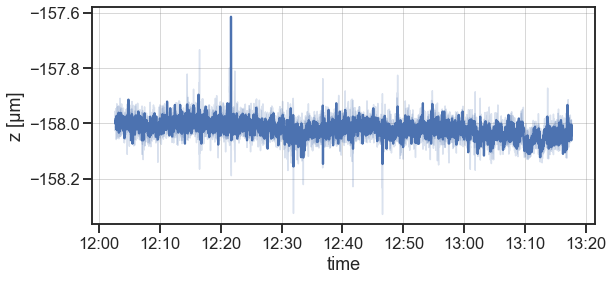

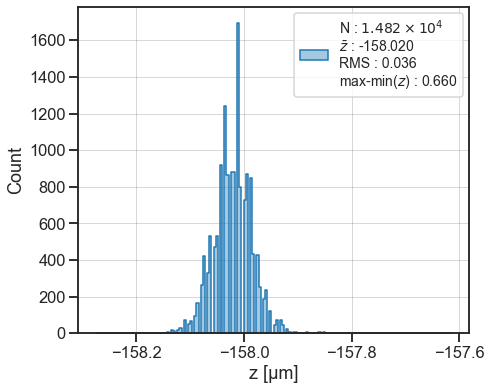

In [5]:
tdp.plot_data_vs_time(table_ref)
tdp.ts_hist(table_ref)
# plt.yscale('log')

In [12]:
table_ref_pt = tdu.point_table(table_ref)

In [13]:
table_ref_pt = tdu.df_convert_unix_to_datetime(table_ref_pt)

(<Figure size 864x864 with 5 Axes>,
 (<AxesSubplot:title={'center':'title'}>,
  <AxesSubplot:xlabel='x [mm]'>,
  <AxesSubplot:ylabel='y [mm]'>))

posx and posy should be finite values


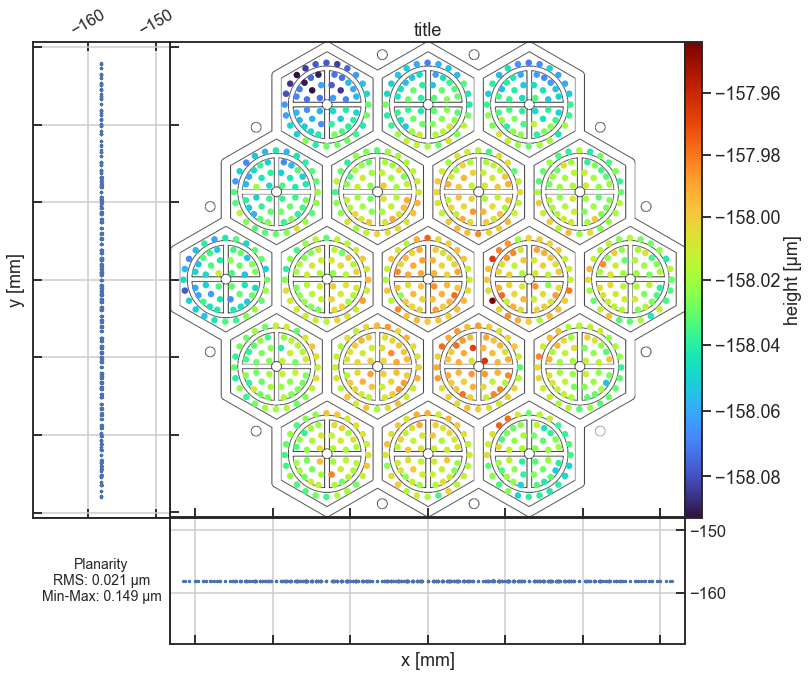

In [19]:
pn_min, pn_mean, pn_max = tdu.calc_min_mean_max(table_ref_pt, mode='z_mean')
tdp.plot_table_hexagon_flatness(table_ref_pt,
                                mode='z_mean',
                                cbar_norm=(pn_min, pn_mean, pn_max),
                                )

## Steelplate

data import

In [20]:
steel_handling = tdu.read_single_measurement(measurement_folder/'steel_disk', '20220502_steelplate_01_after_handling.txt')
steel_handling = tdu.df_convert_unix_to_datetime(steel_handling)

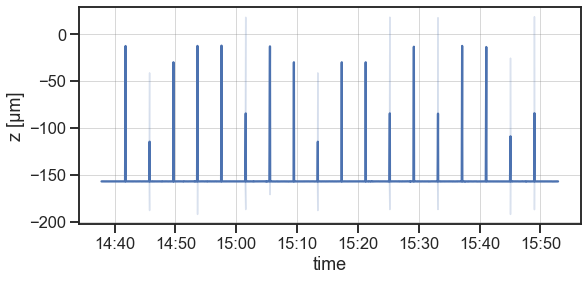

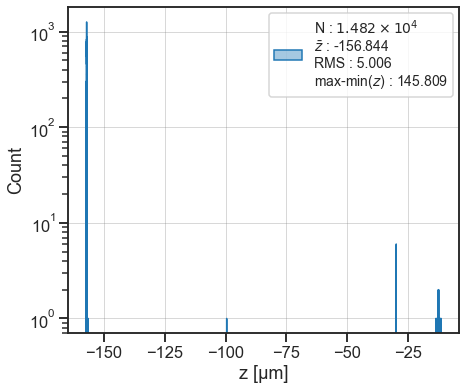

In [23]:
tdp.plot_data_vs_time(steel_handling)
tdp.ts_hist(steel_handling)
plt.yscale('log')

In [34]:
steel_handling = steel_handling.loc[steel_handling.point != 1,:]

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Count'>)

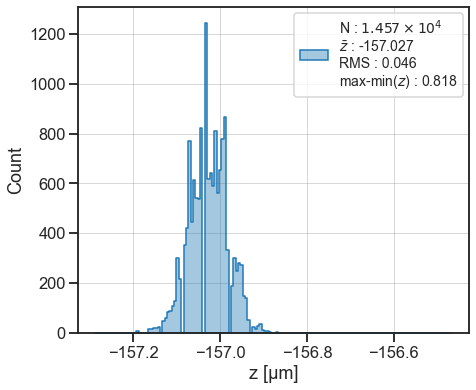

In [36]:
tdp.ts_hist(steel_handling)

In [37]:
steel_handling_pt = tdu.point_table(steel_handling)

## combine measurements

In [38]:
steel_rel = tdu.combine_mean_measurements(steel_handling_pt, table_ref_pt)

In [42]:
steel_rel = tdu.df_convert_unix_to_datetime(steel_rel)

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Count'>)

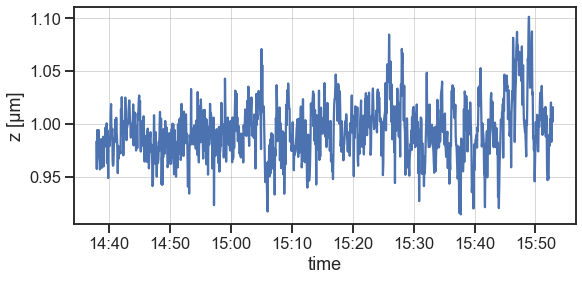

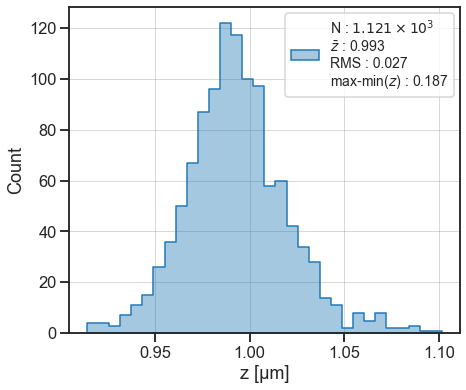

In [44]:
tdp.plot_data_vs_time(steel_rel, mode='z_mean')
tdp.ts_hist(steel_rel, mode='z_mean')

In [46]:
steel_rel.z_mean = tdu.subtract_mean(steel_rel.z_mean)
steel_rel.z_mean = tdu.convert_mm_to_microns(steel_rel.z_mean)

(<Figure size 864x864 with 5 Axes>,
 (<AxesSubplot:title={'center':'Steelplate - Table after Handling'}>,
  <AxesSubplot:xlabel='x [mm]'>,
  <AxesSubplot:ylabel='y [mm]'>))

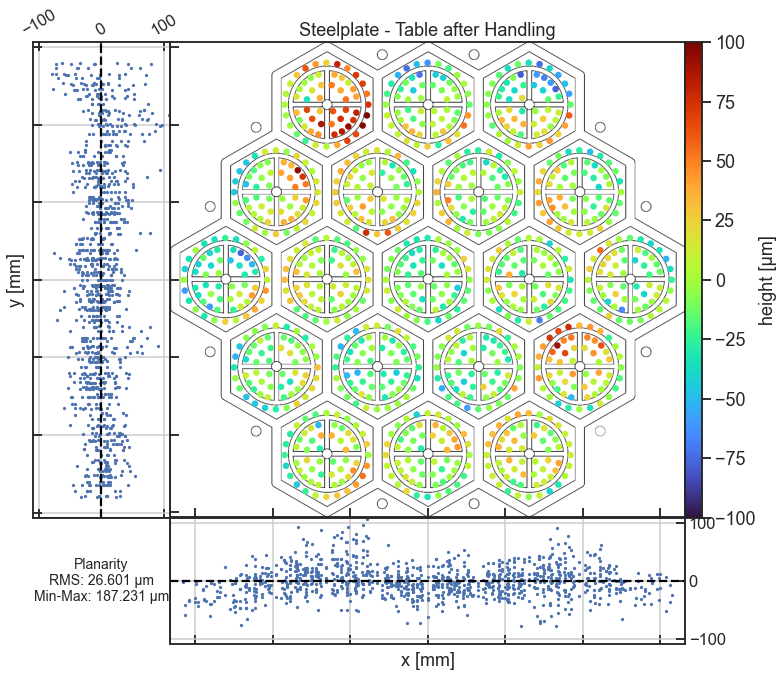

In [49]:
tdp.plot_table_hexagon_flatness(steel_rel, mode='z_mean',
                                title='Steelplate - Table after Handling')

# compare both pre handling and after handling 

In [75]:
steel_pre_after_handling = tdu.combine_mean_measurements(steel_handling_pt, curing_disk_pt)

In [76]:
steel_pre_after_handling.z_mean = tdu.subtract_mean(steel_pre_after_handling.z_mean)
steel_pre_after_handling.z_mean = tdu.convert_mm_to_microns(steel_pre_after_handling.z_mean)

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Count'>)

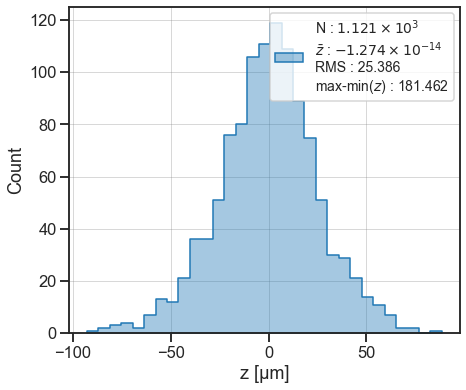

In [80]:
tdp.ts_hist(steel_pre_after_handling, mode='z_mean')

(<Figure size 864x864 with 5 Axes>,
 (<AxesSubplot:title={'center':'Steelplate: after - before handling'}>,
  <AxesSubplot:xlabel='x [mm]'>,
  <AxesSubplot:ylabel='y [mm]'>))

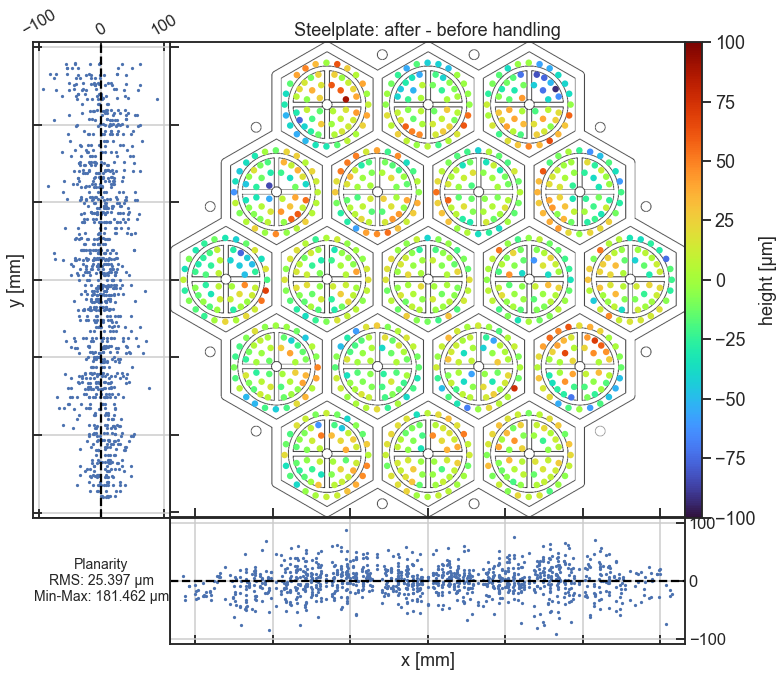

In [78]:
tdp.plot_table_hexagon_flatness(steel_pre_after_handling, mode='z_mean',
                                title='Steelplate: after - before handling')